In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import vtk
import networkx as nx
import pprint  # for nice dictionary formatting
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from matplotlib.backends.backend_pdf import PdfPages
from tqdm import tqdm
from collections import defaultdict
import trimesh
# 3d plot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from scipy.spatial import distance

In [ ]:
# base_folder = "/home/dinesh/M.Tech Data/Chess Test 1"
base_folder = "/home/dinesh/M.Tech Data/Steel Beads"
original_df = pd.read_csv(base_folder + '/data/all_particle_stats.csv', index_col=0)

# filter data points with volume less than 100
df = original_df[original_df['volume'] > 100].copy()

df.head()

In [ ]:
df.columns

## Kmeans

In [ ]:
%cd ../
from core import utils
pcs = utils.get_grains_point_cloud(utils.read_file(base_folder + '/chamf_distance_binarized_chess3a_load1_D4_segmentation.vtp'))
%cd Notebooks

In [ ]:
for k, v in pcs.items():
    print(k, len(v))

In [ ]:
particle_1 = pcs[2055957] # incorrect segmentation
particle_2 = pcs[2672873] # incorrect segmentation
particle_3 = pcs[2353067] # correct segmentation

len(particle_1), len(particle_2), len(particle_3)

In [2]:


def get_kmeans_clusters(points, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(points)
    return kmeans.labels_

def get_cluster_points(points, labels):
    clusters = {}
    for i, label in enumerate(labels):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(points[i])
    return clusters

def mean_distortion(points, labels):
    clusters = get_cluster_points(points, labels)
    mean_distortion = 0
    for label, cluster in clusters.items():
        mean_distortion += np.mean(np.linalg.norm(cluster - np.mean(cluster, axis=0), axis=1))
    return mean_distortion / len(clusters)

In [5]:
def plot_md(particle, title):
    md = []
    for i in range(1, 10):
        kmeans = KMeans(n_clusters=i, random_state=0, n_init=10).fit(particle)
        tmp = distance.cdist(particle, kmeans.cluster_centers_, 'euclidean')
        md.append(sum(np.min(tmp, axis=1)) / len(particle))

    plt.clf()
    plt.title(title)
    plt.plot(range(1, 10), md, )
    plt.savefig('mg_kmeans/' + title.split('.')[0] + '.svg')

    return md

  0%|          | 4/6988 [00:05<2:23:59,  1.24s/it]

grain_752301.vtp n_samples=8 should be >= n_clusters=9


  0%|          | 26/6988 [01:23<3:07:57,  1.62s/it] 

grain_3360327.vtp n_samples=7 should be >= n_clusters=8


  1%|          | 82/6988 [05:28<7:20:57,  3.83s/it] 

grain_897546.vtp n_samples=8 should be >= n_clusters=9


  2%|▏         | 163/6988 [10:27<6:37:31,  3.49s/it] 

grain_3263867.vtp n_samples=8 should be >= n_clusters=9


  2%|▏         | 165/6988 [10:34<5:51:57,  3.10s/it]

grain_1618136.vtp n_samples=8 should be >= n_clusters=9


  3%|▎         | 221/6988 [14:15<3:05:42,  1.65s/it] 

grain_336699.vtp n_samples=6 should be >= n_clusters=7


  4%|▍         | 306/6988 [19:45<7:58:42,  4.30s/it] 

grain_258026.vtp n_samples=8 should be >= n_clusters=9


  5%|▌         | 368/6988 [24:12<7:38:35,  4.16s/it] 

grain_479724.vtp n_samples=8 should be >= n_clusters=9


  6%|▋         | 437/6988 [28:29<2:20:19,  1.29s/it] 

grain_3404831.vtp n_samples=8 should be >= n_clusters=9


  6%|▋         | 439/6988 [28:38<4:40:10,  2.57s/it]

grain_3769131.vtp n_samples=8 should be >= n_clusters=9


  7%|▋         | 455/6988 [29:22<2:30:04,  1.38s/it]

grain_988909.vtp n_samples=8 should be >= n_clusters=9


  7%|▋         | 486/6988 [31:20<5:01:13,  2.78s/it]

grain_2036444.vtp n_samples=8 should be >= n_clusters=9


  7%|▋         | 505/6988 [32:42<6:43:35,  3.74s/it]

grain_2845460.vtp n_samples=8 should be >= n_clusters=9


  7%|▋         | 518/6988 [33:40<5:14:38,  2.92s/it] 

grain_759880.vtp n_samples=8 should be >= n_clusters=9


  8%|▊         | 560/6988 [36:06<4:14:42,  2.38s/it] 

grain_178695.vtp n_samples=8 should be >= n_clusters=9


 10%|▉         | 681/6988 [42:33<5:27:37,  3.12s/it] 

grain_3747981.vtp n_samples=8 should be >= n_clusters=9


 10%|█         | 705/6988 [44:06<4:52:23,  2.79s/it]

grain_3327684.vtp n_samples=8 should be >= n_clusters=9


 11%|█         | 734/6988 [45:44<2:54:50,  1.68s/it]

grain_609425.vtp n_samples=8 should be >= n_clusters=9


 11%|█         | 743/6988 [46:12<2:55:46,  1.69s/it]

grain_2578773.vtp n_samples=8 should be >= n_clusters=9


 11%|█         | 752/6988 [46:36<3:33:59,  2.06s/it]

grain_2299823.vtp n_samples=6 should be >= n_clusters=7


 11%|█         | 761/6988 [47:00<4:58:44,  2.88s/it]

grain_1654580.vtp n_samples=8 should be >= n_clusters=9


 12%|█▏        | 814/6988 [49:44<4:53:09,  2.85s/it] 

grain_467483.vtp n_samples=8 should be >= n_clusters=9


 12%|█▏        | 824/6988 [50:28<8:16:33,  4.83s/it] 

grain_3824445.vtp n_samples=8 should be >= n_clusters=9


 13%|█▎        | 931/6988 [56:20<3:53:05,  2.31s/it]

grain_577108.vtp n_samples=8 should be >= n_clusters=9


 14%|█▎        | 955/6988 [57:34<3:09:12,  1.88s/it]

grain_868221.vtp n_samples=8 should be >= n_clusters=9


 14%|█▍        | 982/6988 [59:12<3:15:09,  1.95s/it] 

grain_1108888.vtp n_samples=8 should be >= n_clusters=9


 14%|█▍        | 999/6988 [1:00:03<3:49:45,  2.30s/it]

grain_1917286.vtp n_samples=8 should be >= n_clusters=9


 16%|█▌        | 1085/6988 [1:05:44<7:41:22,  4.69s/it] 

grain_813529.vtp n_samples=4 should be >= n_clusters=5


 16%|█▌        | 1089/6988 [1:06:01<6:13:28,  3.80s/it]

grain_2067413.vtp n_samples=8 should be >= n_clusters=9


 16%|█▌        | 1122/6988 [1:07:35<3:00:04,  1.84s/it]

grain_1657056.vtp n_samples=8 should be >= n_clusters=9


 17%|█▋        | 1190/6988 [1:11:26<4:17:23,  2.66s/it]

grain_1027774.vtp n_samples=8 should be >= n_clusters=9


 20%|█▉        | 1374/6988 [1:22:37<3:15:57,  2.09s/it] 

grain_2678624.vtp n_samples=8 should be >= n_clusters=9


 20%|█▉        | 1382/6988 [1:23:07<3:22:14,  2.16s/it]

grain_383280.vtp n_samples=8 should be >= n_clusters=9


 20%|██        | 1410/6988 [1:24:34<4:27:27,  2.88s/it]

grain_957634.vtp n_samples=8 should be >= n_clusters=9


 20%|██        | 1422/6988 [1:25:13<3:45:43,  2.43s/it]

grain_3735771.vtp n_samples=8 should be >= n_clusters=9


 21%|██        | 1462/6988 [1:27:23<4:53:04,  3.18s/it]

grain_1546454.vtp n_samples=8 should be >= n_clusters=9


 21%|██▏       | 1491/6988 [1:29:30<4:27:43,  2.92s/it]

grain_2052071.vtp n_samples=8 should be >= n_clusters=9


 21%|██▏       | 1502/6988 [1:30:14<4:44:54,  3.12s/it]

grain_1025822.vtp n_samples=8 should be >= n_clusters=9


 22%|██▏       | 1541/6988 [1:32:45<5:18:34,  3.51s/it]

grain_2699379.vtp n_samples=8 should be >= n_clusters=9


 22%|██▏       | 1542/6988 [1:32:45<3:52:44,  2.56s/it]

grain_2237633.vtp n_samples=8 should be >= n_clusters=9


 22%|██▏       | 1555/6988 [1:33:35<5:17:41,  3.51s/it]

grain_2809090.vtp n_samples=8 should be >= n_clusters=9


 23%|██▎       | 1624/6988 [1:37:47<5:34:41,  3.74s/it] 

grain_2652435.vtp n_samples=8 should be >= n_clusters=9


 23%|██▎       | 1626/6988 [1:37:49<3:19:20,  2.23s/it]

grain_1598068.vtp n_samples=8 should be >= n_clusters=9


 24%|██▍       | 1668/6988 [1:40:23<4:34:07,  3.09s/it]

grain_1085808.vtp n_samples=8 should be >= n_clusters=9


 24%|██▍       | 1686/6988 [1:41:25<2:10:16,  1.47s/it]

grain_829413.vtp n_samples=8 should be >= n_clusters=9


 25%|██▍       | 1737/6988 [1:43:59<3:58:36,  2.73s/it]

grain_2048084.vtp n_samples=8 should be >= n_clusters=9


 25%|██▌       | 1764/6988 [1:45:23<3:57:29,  2.73s/it]

grain_1114562.vtp n_samples=8 should be >= n_clusters=9


 27%|██▋       | 1852/6988 [1:50:53<4:23:51,  3.08s/it]

grain_2039680.vtp n_samples=8 should be >= n_clusters=9


 28%|██▊       | 1935/6988 [1:55:29<3:42:30,  2.64s/it]

grain_1283849.vtp n_samples=8 should be >= n_clusters=9


 28%|██▊       | 1947/6988 [1:56:10<3:14:56,  2.32s/it]

grain_1953300.vtp n_samples=8 should be >= n_clusters=9


 28%|██▊       | 1982/6988 [1:58:02<3:07:35,  2.25s/it]

grain_832314.vtp n_samples=8 should be >= n_clusters=9


 29%|██▉       | 2052/6988 [2:02:33<1:42:58,  1.25s/it]

grain_257080.vtp n_samples=8 should be >= n_clusters=9


 31%|███       | 2159/6988 [2:09:09<5:06:40,  3.81s/it] 

grain_2234492.vtp n_samples=8 should be >= n_clusters=9


 31%|███▏      | 2194/6988 [2:11:07<2:44:43,  2.06s/it]

grain_3300212.vtp n_samples=4 should be >= n_clusters=5


 32%|███▏      | 2208/6988 [2:11:57<2:58:09,  2.24s/it]

grain_641937.vtp n_samples=8 should be >= n_clusters=9


 32%|███▏      | 2226/6988 [2:13:06<2:08:48,  1.62s/it]

grain_3228586.vtp n_samples=8 should be >= n_clusters=9


 32%|███▏      | 2257/6988 [2:15:26<3:18:13,  2.51s/it]

grain_1140106.vtp n_samples=8 should be >= n_clusters=9


 33%|███▎      | 2288/6988 [2:16:57<3:08:22,  2.40s/it]

grain_1641610.vtp n_samples=8 should be >= n_clusters=9


 33%|███▎      | 2340/6988 [2:19:59<3:10:50,  2.46s/it]

grain_3323518.vtp n_samples=8 should be >= n_clusters=9


 34%|███▍      | 2371/6988 [2:21:23<3:00:33,  2.35s/it]

grain_936409.vtp n_samples=4 should be >= n_clusters=5


 34%|███▍      | 2402/6988 [2:23:12<2:48:47,  2.21s/it]

grain_302749.vtp n_samples=8 should be >= n_clusters=9


 35%|███▍      | 2436/6988 [2:25:10<4:51:08,  3.84s/it]

grain_2374045.vtp n_samples=8 should be >= n_clusters=9


 36%|███▌      | 2495/6988 [2:28:23<3:25:52,  2.75s/it]

grain_2168478.vtp n_samples=8 should be >= n_clusters=9


 36%|███▌      | 2504/6988 [2:29:01<4:29:04,  3.60s/it]

grain_3315099.vtp n_samples=8 should be >= n_clusters=9


 37%|███▋      | 2559/6988 [2:32:09<2:32:33,  2.07s/it]

grain_710422.vtp n_samples=4 should be >= n_clusters=5


 37%|███▋      | 2585/6988 [2:33:46<2:59:01,  2.44s/it]

grain_233432.vtp n_samples=8 should be >= n_clusters=9


 37%|███▋      | 2620/6988 [2:36:25<2:33:56,  2.11s/it]

grain_1354074.vtp n_samples=8 should be >= n_clusters=9


 38%|███▊      | 2671/6988 [2:39:44<3:59:56,  3.33s/it]

grain_3673726.vtp n_samples=8 should be >= n_clusters=9


 39%|███▉      | 2717/6988 [2:43:05<3:53:55,  3.29s/it]

grain_3731034.vtp n_samples=4 should be >= n_clusters=5


 39%|███▉      | 2756/6988 [2:45:43<4:05:44,  3.48s/it]

grain_999225.vtp n_samples=8 should be >= n_clusters=9


 40%|████      | 2797/6988 [2:47:57<3:53:28,  3.34s/it]

grain_3715279.vtp n_samples=8 should be >= n_clusters=9


 40%|████      | 2824/6988 [2:49:29<3:31:20,  3.05s/it]

grain_1535128.vtp n_samples=8 should be >= n_clusters=9


 41%|████      | 2857/6988 [2:52:19<4:48:18,  4.19s/it]

grain_2194225.vtp n_samples=8 should be >= n_clusters=9


 41%|████      | 2866/6988 [2:52:48<3:54:14,  3.41s/it]

grain_2344171.vtp n_samples=8 should be >= n_clusters=9


 41%|████      | 2870/6988 [2:52:57<2:17:47,  2.01s/it]

grain_2993021.vtp n_samples=8 should be >= n_clusters=9


 41%|████▏     | 2894/6988 [2:54:15<3:05:31,  2.72s/it]

grain_3159847.vtp n_samples=8 should be >= n_clusters=9
grain_940627.vtp n_samples=4 should be >= n_clusters=5


 42%|████▏     | 2969/6988 [2:59:16<2:54:53,  2.61s/it]

grain_206831.vtp n_samples=8 should be >= n_clusters=9


 43%|████▎     | 3024/6988 [3:02:19<3:08:44,  2.86s/it]

grain_1186130.vtp n_samples=8 should be >= n_clusters=9


 43%|████▎     | 3032/6988 [3:02:51<3:29:06,  3.17s/it]

grain_1206314.vtp n_samples=8 should be >= n_clusters=9


 45%|████▍     | 3123/6988 [3:08:39<3:29:46,  3.26s/it]

grain_99148.vtp n_samples=8 should be >= n_clusters=9


 45%|████▍     | 3134/6988 [3:09:37<5:26:18,  5.08s/it]

grain_532330.vtp n_samples=8 should be >= n_clusters=9


 45%|████▌     | 3146/6988 [3:10:19<3:41:26,  3.46s/it]

grain_1375885.vtp n_samples=8 should be >= n_clusters=9


 45%|████▌     | 3158/6988 [3:10:55<3:22:29,  3.17s/it]

grain_2100018.vtp n_samples=8 should be >= n_clusters=9


 46%|████▌     | 3190/6988 [3:13:03<3:49:09,  3.62s/it]

grain_3380966.vtp n_samples=8 should be >= n_clusters=9


 46%|████▌     | 3192/6988 [3:13:08<2:55:40,  2.78s/it]

grain_2932784.vtp n_samples=8 should be >= n_clusters=9


 46%|████▌     | 3203/6988 [3:13:37<2:41:57,  2.57s/it]

grain_1794581.vtp n_samples=8 should be >= n_clusters=9


 46%|████▌     | 3228/6988 [3:15:20<2:40:49,  2.57s/it]

grain_2113276.vtp n_samples=8 should be >= n_clusters=9


 46%|████▋     | 3233/6988 [3:15:33<2:32:57,  2.44s/it]

grain_2276228.vtp n_samples=8 should be >= n_clusters=9


 47%|████▋     | 3250/6988 [3:16:09<1:45:36,  1.70s/it]

grain_870255.vtp n_samples=8 should be >= n_clusters=9


 47%|████▋     | 3272/6988 [3:17:33<2:35:13,  2.51s/it]

grain_2228785.vtp n_samples=8 should be >= n_clusters=9


 47%|████▋     | 3319/6988 [3:20:35<2:28:54,  2.44s/it]

grain_227446.vtp n_samples=8 should be >= n_clusters=9


 49%|████▉     | 3424/6988 [3:27:26<4:08:02,  4.18s/it]

grain_2603840.vtp n_samples=8 should be >= n_clusters=9


 50%|█████     | 3506/6988 [3:32:37<3:25:52,  3.55s/it]

grain_1823676.vtp n_samples=8 should be >= n_clusters=9


 51%|█████     | 3553/6988 [3:35:36<3:02:54,  3.19s/it]

grain_3514207.vtp n_samples=8 should be >= n_clusters=9


 51%|█████     | 3555/6988 [3:35:37<1:48:09,  1.89s/it]

grain_516737.vtp n_samples=8 should be >= n_clusters=9


 51%|█████     | 3569/6988 [3:36:31<2:30:38,  2.64s/it]

grain_103696.vtp n_samples=8 should be >= n_clusters=9


 51%|█████     | 3579/6988 [3:36:57<2:09:45,  2.28s/it]

grain_2849910.vtp n_samples=8 should be >= n_clusters=9


 51%|█████▏    | 3588/6988 [3:37:39<2:01:47,  2.15s/it]

grain_1436278.vtp n_samples=8 should be >= n_clusters=9


 52%|█████▏    | 3621/6988 [3:39:34<3:08:06,  3.35s/it]

grain_2862468.vtp n_samples=8 should be >= n_clusters=9


 53%|█████▎    | 3690/6988 [3:44:01<2:04:04,  2.26s/it]

grain_2757109.vtp n_samples=8 should be >= n_clusters=9


 53%|█████▎    | 3720/6988 [3:45:53<1:57:40,  2.16s/it]

grain_3819518.vtp n_samples=8 should be >= n_clusters=9


 54%|█████▍    | 3798/6988 [3:51:09<2:53:29,  3.26s/it]

grain_3763373.vtp n_samples=8 should be >= n_clusters=9


 54%|█████▍    | 3805/6988 [3:51:39<3:00:54,  3.41s/it]

grain_594233.vtp n_samples=8 should be >= n_clusters=9


 55%|█████▍    | 3831/6988 [3:52:55<1:57:14,  2.23s/it]

grain_3254157.vtp n_samples=8 should be >= n_clusters=9


 57%|█████▋    | 3996/6988 [4:02:40<1:45:11,  2.11s/it]

grain_2200240.vtp n_samples=8 should be >= n_clusters=9


 58%|█████▊    | 4027/6988 [4:04:24<1:19:18,  1.61s/it]

grain_2222290.vtp n_samples=8 should be >= n_clusters=9


 58%|█████▊    | 4053/6988 [4:06:21<2:53:34,  3.55s/it]

grain_437196.vtp n_samples=8 should be >= n_clusters=9


 59%|█████▉    | 4116/6988 [4:09:58<2:36:02,  3.26s/it]

grain_2860300.vtp n_samples=8 should be >= n_clusters=9


 59%|█████▉    | 4141/6988 [4:11:34<1:40:00,  2.11s/it]

grain_1981534.vtp n_samples=8 should be >= n_clusters=9


 60%|█████▉    | 4163/6988 [4:12:42<1:25:17,  1.81s/it]

grain_2872034.vtp n_samples=8 should be >= n_clusters=9


 61%|██████    | 4253/6988 [4:18:08<2:13:09,  2.92s/it]

grain_3036654.vtp n_samples=8 should be >= n_clusters=9


 61%|██████    | 4260/6988 [4:18:42<2:54:37,  3.84s/it]

grain_172956.vtp n_samples=8 should be >= n_clusters=9


 61%|██████▏   | 4294/6988 [4:20:59<3:05:25,  4.13s/it]

grain_3134438.vtp n_samples=8 should be >= n_clusters=9


 62%|██████▏   | 4350/6988 [4:24:32<1:35:10,  2.16s/it]

grain_2575714.vtp n_samples=8 should be >= n_clusters=9


 62%|██████▏   | 4364/6988 [4:25:19<2:13:40,  3.06s/it]

grain_1477756.vtp n_samples=8 should be >= n_clusters=9


 63%|██████▎   | 4390/6988 [4:27:05<1:40:00,  2.31s/it]

grain_2612641.vtp n_samples=8 should be >= n_clusters=9


 63%|██████▎   | 4395/6988 [4:27:12<1:04:21,  1.49s/it]

grain_481694.vtp n_samples=8 should be >= n_clusters=9


 64%|██████▍   | 4477/6988 [4:32:01<59:24,  1.42s/it]  

grain_2741903.vtp n_samples=8 should be >= n_clusters=9


 64%|██████▍   | 4500/6988 [4:33:17<49:11,  1.19s/it]  

grain_1030431.vtp n_samples=8 should be >= n_clusters=9


 65%|██████▍   | 4521/6988 [4:34:37<1:18:14,  1.90s/it]

grain_2288452.vtp n_samples=8 should be >= n_clusters=9


 66%|██████▋   | 4635/6988 [4:41:23<3:23:40,  5.19s/it]

grain_3898257.vtp n_samples=8 should be >= n_clusters=9


 67%|██████▋   | 4696/6988 [4:44:42<1:00:33,  1.59s/it]

grain_1708254.vtp n_samples=8 should be >= n_clusters=9


 68%|██████▊   | 4765/6988 [4:48:59<52:42,  1.42s/it]  

grain_677733.vtp n_samples=8 should be >= n_clusters=9


 69%|██████▉   | 4809/6988 [4:51:59<2:12:39,  3.65s/it]

grain_2604.vtp n_samples=8 should be >= n_clusters=9


 70%|██████▉   | 4878/6988 [4:56:13<1:23:04,  2.36s/it]

grain_3248380.vtp n_samples=8 should be >= n_clusters=9


 70%|███████   | 4922/6988 [4:58:48<53:30,  1.55s/it]  

grain_2466597.vtp n_samples=8 should be >= n_clusters=9


 70%|███████   | 4925/6988 [4:59:00<1:32:34,  2.69s/it]

grain_1771257.vtp n_samples=8 should be >= n_clusters=9


 71%|███████   | 4934/6988 [4:59:29<1:07:39,  1.98s/it]

grain_1197699.vtp n_samples=8 should be >= n_clusters=9


 71%|███████   | 4939/6988 [4:59:49<1:51:07,  3.25s/it]

grain_2230070.vtp n_samples=8 should be >= n_clusters=9


 71%|███████   | 4942/6988 [5:00:03<2:07:50,  3.75s/it]

grain_334702.vtp n_samples=8 should be >= n_clusters=9


 71%|███████   | 4949/6988 [5:00:18<1:04:17,  1.89s/it]

grain_3687310.vtp n_samples=8 should be >= n_clusters=9


 71%|███████   | 4966/6988 [5:01:11<1:34:57,  2.82s/it]

grain_1825334.vtp n_samples=8 should be >= n_clusters=9


 73%|███████▎  | 5077/6988 [5:08:02<1:23:21,  2.62s/it]

grain_1871385.vtp n_samples=8 should be >= n_clusters=9


 74%|███████▍  | 5191/6988 [5:14:48<1:19:05,  2.64s/it]

grain_1322779.vtp n_samples=8 should be >= n_clusters=9


 76%|███████▌  | 5313/6988 [5:22:01<57:05,  2.05s/it]  

grain_1921185.vtp n_samples=8 should be >= n_clusters=9


 77%|███████▋  | 5385/6988 [5:26:07<1:08:39,  2.57s/it]

grain_3535793.vtp n_samples=8 should be >= n_clusters=9


 77%|███████▋  | 5412/6988 [5:28:08<1:24:31,  3.22s/it]

grain_3266692.vtp n_samples=8 should be >= n_clusters=9


 78%|███████▊  | 5454/6988 [5:30:20<59:28,  2.33s/it]  

grain_2112294.vtp n_samples=8 should be >= n_clusters=9


 78%|███████▊  | 5466/6988 [5:30:53<52:15,  2.06s/it]  

grain_2325001.vtp n_samples=8 should be >= n_clusters=9


 79%|███████▊  | 5494/6988 [5:32:25<1:06:53,  2.69s/it]

grain_3413315.vtp n_samples=8 should be >= n_clusters=9


 79%|███████▉  | 5505/6988 [5:32:57<1:06:32,  2.69s/it]

grain_3772790.vtp n_samples=8 should be >= n_clusters=9


 79%|███████▉  | 5528/6988 [5:34:18<1:18:56,  3.24s/it]

grain_2243161.vtp n_samples=8 should be >= n_clusters=9


 80%|████████  | 5595/6988 [5:37:51<1:09:05,  2.98s/it]

grain_1230610.vtp n_samples=8 should be >= n_clusters=9


 81%|████████  | 5661/6988 [5:42:13<48:01,  2.17s/it]  

grain_1543478.vtp n_samples=8 should be >= n_clusters=9


 81%|████████▏ | 5679/6988 [5:43:37<1:11:10,  3.26s/it]

grain_2939700.vtp n_samples=4 should be >= n_clusters=5


 81%|████████▏ | 5694/6988 [5:44:11<32:32,  1.51s/it]  

grain_363368.vtp n_samples=8 should be >= n_clusters=9


 83%|████████▎ | 5811/6988 [5:50:14<34:13,  1.74s/it]  

grain_782865.vtp n_samples=8 should be >= n_clusters=9


 84%|████████▍ | 5883/6988 [5:54:52<32:23,  1.76s/it]  

grain_2943476.vtp n_samples=8 should be >= n_clusters=9


 86%|████████▌ | 6015/6988 [6:02:20<39:00,  2.41s/it]  

grain_142344.vtp n_samples=8 should be >= n_clusters=9


 86%|████████▌ | 6024/6988 [6:02:52<27:31,  1.71s/it]  

grain_2774564.vtp n_samples=8 should be >= n_clusters=9


 87%|████████▋ | 6049/6988 [6:04:13<50:12,  3.21s/it]  

grain_901461.vtp n_samples=8 should be >= n_clusters=9


 88%|████████▊ | 6115/6988 [6:07:43<25:25,  1.75s/it]  

grain_84507.vtp n_samples=8 should be >= n_clusters=9


 88%|████████▊ | 6129/6988 [6:08:17<31:05,  2.17s/it]

grain_3018789.vtp n_samples=8 should be >= n_clusters=9


 89%|████████▉ | 6209/6988 [6:13:47<54:23,  4.19s/it]  

grain_2673343.vtp n_samples=8 should be >= n_clusters=9


 89%|████████▉ | 6210/6988 [6:13:47<39:17,  3.03s/it]

grain_3306584.vtp n_samples=8 should be >= n_clusters=9


 89%|████████▉ | 6217/6988 [6:14:09<29:35,  2.30s/it]

grain_2726987.vtp n_samples=8 should be >= n_clusters=9


 89%|████████▉ | 6221/6988 [6:14:12<14:54,  1.17s/it]

grain_2641943.vtp n_samples=8 should be >= n_clusters=9


 90%|████████▉ | 6266/6988 [6:16:15<17:23,  1.44s/it]  

grain_3076913.vtp n_samples=4 should be >= n_clusters=5


 91%|█████████▏| 6386/6988 [6:23:58<26:42,  2.66s/it]  

grain_3304874.vtp n_samples=8 should be >= n_clusters=9


 91%|█████████▏| 6388/6988 [6:24:00<17:49,  1.78s/it]

grain_664384.vtp n_samples=8 should be >= n_clusters=9


 92%|█████████▏| 6451/6988 [6:27:49<17:32,  1.96s/it]

grain_1503426.vtp n_samples=8 should be >= n_clusters=9


 93%|█████████▎| 6501/6988 [6:31:02<30:31,  3.76s/it]

grain_2116670.vtp n_samples=8 should be >= n_clusters=9


 93%|█████████▎| 6505/6988 [6:31:17<29:41,  3.69s/it]

grain_424674.vtp n_samples=8 should be >= n_clusters=9


 93%|█████████▎| 6520/6988 [6:32:17<25:25,  3.26s/it]

grain_1415972.vtp n_samples=8 should be >= n_clusters=9


 95%|█████████▍| 6636/6988 [6:38:55<12:54,  2.20s/it]

grain_1429698.vtp n_samples=8 should be >= n_clusters=9


 96%|█████████▌| 6685/6988 [6:41:29<07:51,  1.56s/it]

grain_3864881.vtp n_samples=8 should be >= n_clusters=9


 96%|█████████▌| 6693/6988 [6:41:46<07:38,  1.55s/it]

grain_1024088.vtp n_samples=8 should be >= n_clusters=9


 96%|█████████▌| 6700/6988 [6:42:00<07:06,  1.48s/it]

grain_2663255.vtp n_samples=8 should be >= n_clusters=9


 96%|█████████▋| 6742/6988 [6:44:47<15:11,  3.71s/it]

grain_985195.vtp n_samples=8 should be >= n_clusters=9


 98%|█████████▊| 6817/6988 [6:49:38<05:48,  2.04s/it]

grain_2086419.vtp n_samples=8 should be >= n_clusters=9


 98%|█████████▊| 6818/6988 [6:49:38<04:18,  1.52s/it]

grain_3426599.vtp n_samples=8 should be >= n_clusters=9


 99%|█████████▉| 6914/6988 [6:56:31<05:04,  4.11s/it]

grain_3581604.vtp n_samples=8 should be >= n_clusters=9


 99%|█████████▉| 6919/6988 [6:56:46<03:41,  3.22s/it]

grain_378550.vtp n_samples=8 should be >= n_clusters=9


100%|█████████▉| 6964/6988 [7:00:23<01:30,  3.79s/it]

grain_2470130.vtp n_samples=8 should be >= n_clusters=9


100%|█████████▉| 6966/6988 [7:00:25<00:48,  2.20s/it]

grain_1632345.vtp n_samples=4 should be >= n_clusters=5


100%|█████████▉| 6983/6988 [7:01:40<00:22,  4.58s/it]

grain_1769746.vtp n_samples=8 should be >= n_clusters=9


100%|██████████| 6988/6988 [7:01:58<00:00,  3.62s/it]


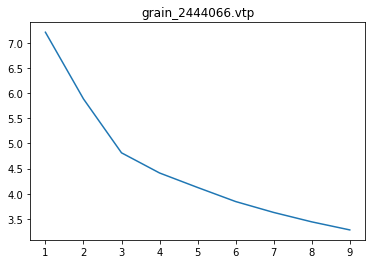

In [6]:
base_folder = "/home/rathoddinesh/Bit Repos/Chess Seg/grains"
stats_dict = defaultdict(list)
for pc_file in tqdm(os.listdir(base_folder)):
    try:
        reader = vtk.vtkXMLPolyDataReader()
        reader.SetFileName(base_folder + '/' + pc_file)
        reader.Update()

        polydata = reader.GetOutput()

        points = []
        for i in range(polydata.GetNumberOfPoints()):
            points.append(polydata.GetPoint(i))
        
        stats_dict[pc_file] = plot_md(points, pc_file)
    except Exception as e:
        print(pc_file, e)

# save stats to csv
df = pd.DataFrame(stats_dict)
df.to_csv('mg_kmeans/stats.csv')

In [7]:
df.T.to_csv('md_stats.csv')

In [ ]:
plot_md(particle_1, title='Incorrect Segmentation')
plot_md(particle_2, title='Incorrect Segmentation')
plot_md(particle_3, title='Correct Segmentation')

In [ ]:
def parse_neighbour_list(neighbour_list):
    neighbour_list = neighbour_list[1:-1]
    return [x for x in neighbour_list.split(',')]

In [ ]:
# filter out the columns we don't need
req_col = ['normalized_shape_index', 'EI', 'FI', 'S', 'C']

filtered_df = df[req_col].copy()
# # rename the column neighbours to num_neighbours using loc
# filtered_df['neighbours'] = filtered_df['neighbours'].apply(parse_neighbour_list).apply(len)
# # rename the column neighbours to num_neighbours
# filtered_df.rename(columns={'neighbours': 'num_neighbours'}, inplace=True)
# # eig_vals is a string, convert it to a list of floats
# filtered_df['eig_vals'] = filtered_df['eig_vals'].apply(parse_neighbour_list).apply(lambda x: [float(y) for y in x])
# # split the eig_vals into 3 columns
# filtered_df['eig_val_1'] = filtered_df['eig_vals'].apply(lambda x: x[0])
# filtered_df['eig_val_2'] = filtered_df['eig_vals'].apply(lambda x: x[1])
# filtered_df['eig_val_3'] = filtered_df['eig_vals'].apply(lambda x: x[2])
# # drop the eig_vals column
# filtered_df.drop(columns=['eig_vals'], inplace=True)
filtered_df.head()

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, init="random")
tsne_results = tsne.fit_transform(filtered_df)

In [ ]:
plt.figure(figsize=(16,10))
vec_color = filtered_df['FI']
norm = plt.Normalize(vec_color.min(), vec_color.max())
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=vec_color, cmap='viridis', norm=norm)
plt.colorbar()
plt.show()


## 3d projection of the data

In [ ]:
tsne_3d = TSNE(n_components=3, verbose=1, perplexity=40, init="random")
tsne_3d_results = tsne_3d.fit_transform(filtered_df)

In [ ]:


fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
vec_color = filtered_df['FI']
ax.scatter(tsne_3d_results[:,0], tsne_3d_results[:,1], tsne_3d_results[:,2], c=vec_color, cmap='viridis')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
# colorbar
m = plt.cm.ScalarMappable(cmap='viridis')
m.set_array(vec_color)
m.set_clim(vmin=vec_color.min(), vmax=vec_color.max())
fig.colorbar(m)
plt.show()

## Kmeans

In [ ]:

kmeans = KMeans(n_clusters=2)
kmeans.fit(filtered_df)

In [ ]:
for i in range(kmeans.n_clusters):
    print(i, np.sum(kmeans.labels_ == i))

In [ ]:
# print the data points in each cluster
# for i in range(kmeans.n_clusters):
df[kmeans.labels_ == 1]

In [ ]:
from scipy.spatial import distance

mean_distortion = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i).fit(filtered_df)
    tmp = distance.cdist(filtered_df, kmeans.cluster_centers_, 'euclidean')
    mean_distortion.append(sum(np.min(tmp, axis=1)) / len(filtered_df))

In [ ]:
# plot the elbow
plt.plot(range(1, 50), mean_distortion, )
plt.show()

In [ ]:
# 15 clusters
kmeans = KMeans(n_clusters=3).fit(filtered_df)
# print the data points in each cluster
for i in range(kmeans.n_clusters):
    print(i, np.sum(kmeans.labels_ == i))

## saving cluster labels to file

In [ ]:
# append the cluster labels to the dataframe and initialize nan
original_df['cluster'] = -1

# fill the cluster labels
for i in range(kmeans.n_clusters):
    cp_ids = df[kmeans.labels_ == i]['cp_id'].values
    original_df.loc[original_df['cp_id'].isin(cp_ids), 'cluster'] = i

original_df.to_csv(base_folder + '/data/clustered.csv', index=False)

In [ ]:


base_dir = "/home/rathoddinesh/Bit Repos/Chess Seg/simplified/"
count  = 0

with PdfPages('multipage_pdf.pdf') as pdf:
    # read each file from the directory
    for file in tqdm(os.listdir(base_dir)):
        reader = vtk.vtkXMLPolyDataReader()
        reader.SetFileName(base_dir + file)
        reader.Update()

        polydata = reader.GetOutput()

    # # num of points
    # print(polydata.GetNumberOfPoints())

    # print all array names in the file
    # for i in range(polydata.GetPointData().GetNumberOfArrays()):
    #     print(polydata.GetPointData().GetArrayName(i))

        array_saddle = polydata.GetPointData().GetArray("CP ID")
        array_max_1 = polydata.GetPointData().GetArray("Max1 ID")
        array_max_2 = polydata.GetPointData().GetArray("Max2 ID")
        # print(array_saddle.GetNumberOfTuples())
        # print(array_max_1.GetNumberOfTuples())
        # print(array_max_2.GetNumberOfTuples())

        nodes = set()
        for i in range(array_saddle.GetNumberOfTuples()):
            nodes.add(array_saddle.GetValue(i))
            nodes.add(array_max_1.GetValue(i))
            nodes.add(array_max_2.GetValue(i))

    # print(len(nodes))

        mapping_dict = {}
        for i, node in enumerate(nodes):
            mapping_dict[node] = i

    # pprint.pprint(mapping_dict)

        G = nx.Graph()
        for i in range(array_saddle.GetNumberOfTuples()):
            G.add_edge(mapping_dict[array_saddle.GetValue(i)], mapping_dict[array_max_1.GetValue(i)])
            G.add_edge(mapping_dict[array_saddle.GetValue(i)], mapping_dict[array_max_2.GetValue(i)])

    # print("Number of nodes: ", G.number_of_nodes())
    # print("Number of edges: ", G.number_of_edges())

    # plot the graph
    # nx.draw(G)
    # plt.show()

    # G = nx.cycle_graph(3)
    # # betweenness centrality
    # bc = nx.betweenness_centrality(G)
    # print(bc)

    # # display the graph color by betweenness centrality
    # nx.draw(G, node_color=[v * 100 for v in bc.values()])
    # plt.show()

    # G.add_edge(2, 3)
    # G.add_edge(3, 4)
    # G.add_edge(4, 5)
    # # G.add_edge(5, 3)
    # # betweenness centrality
        bc = nx.betweenness_centrality(G)
    # print(bc)

    # # # display the graph with colorbar
    # fig, ax = plt.subplots()
    # nx.draw(G, node_color=[v * 100 for v in bc.values()])
    # fig.colorbar(plt.cm.ScalarMappable())
    # plt.show()

    # # histogram of betweenness centrality
    # bc = nx.betweenness_centrality(G)
    # plt.hist(bc.values())
    # plt.show()

        # create a empty pdf and append all plots in it

        
        # betweenness centrality
        # print(bc)

        # display the graph color by betweenness centrality
        plt.title(file)
        nx.draw(G, node_color=[v * 100 for v in bc.values()])
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

        # histogram of betweenness centrality
        plt.title(file)
        plt.hist(bc.values())
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

        # count += 1
        # if count == 10:
        #     break

# graph clustering

In [ ]:


base_dir = "/home/dinesh/M.Tech Data/Chess Seg/simplified/"
count  = 0

num_clusters_list = defaultdict(int)

# read each file from the directory
for file in tqdm(os.listdir(base_dir)):
    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(base_dir + file)
    reader.Update()

    polydata = reader.GetOutput()

    array_saddle = polydata.GetPointData().GetArray("CP ID")
    array_max_1 = polydata.GetPointData().GetArray("Max1 ID")
    array_max_2 = polydata.GetPointData().GetArray("Max2 ID")
    

    nodes = set()
    for i in range(array_saddle.GetNumberOfTuples()):
        nodes.add(array_saddle.GetValue(i))
        nodes.add(array_max_1.GetValue(i))
        nodes.add(array_max_2.GetValue(i))

    mapping_dict = {}
    for i, node in enumerate(nodes):
        mapping_dict[node] = i

    G = nx.Graph()
    for i in range(array_saddle.GetNumberOfTuples()):
        G.add_edge(mapping_dict[array_saddle.GetValue(i)], mapping_dict[array_max_1.GetValue(i)])
        G.add_edge(mapping_dict[array_saddle.GetValue(i)], mapping_dict[array_max_2.GetValue(i)])

    # louvain community detection
    try:
        num_clusters_list[int(file.split('.')[0])] = len(list(nx.algorithms.community.louvain_communities(G)))
    except:
        continue

# save the dictionary to a csv file
with open('num_clusters.csv', 'w') as f:
    for key in num_clusters_list.keys():
        f.write("%s,%s" % (key, num_clusters_list[key]))
        f.write("\n")



In [ ]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 1)
import matplotlib.pyplot as plt
nx.draw(G)
plt.show()
print(nx.average_clustering(G))

# convex mesh

In [ ]:
# read vtp file using trimesh
base_folder = "/home/dinesh/M.Tech Data/Chess Seg/ensemble"
convex_dict = defaultdict(bool)
for file in tqdm(os.listdir(base_folder)):
    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(base_folder + "/" + file)
    reader.Update()
    polydata = reader.GetOutput()

    vertices = []
    for i in range(polydata.GetNumberOfPoints()):
        vertices.append(polydata.GetPoint(i))

    faces = []
    for i in range(polydata.GetNumberOfCells()):
        face = polydata.GetCell(i)
        face = [face.GetPointId(j) for j in range(face.GetNumberOfPoints())]
        faces.append(face)

    mesh = trimesh.Trimesh(vertices, faces)
    convex_dict[int(file.split('.')[0])] = mesh.is_convex

    if mesh.is_convex:
        # decompose the mesh into convex parts
        convex_parts = pyVHACD.compute_vhacd(mesh.vertices, mesh.faces)
        # save the convex parts
        for i, (mesh_verts, mesh_faces) in enumerate(convex_parts):
            # convert mesh_faces list to list of 3-tuples
            faces = []
            for j in range(0, len(mesh_faces), 3):
                if (j+2) >= len(mesh_faces):
                    break
                faces.append((mesh_faces[j], mesh_faces[j+1], mesh_faces[j+2]))
            mesh_faces = faces
            part_mesh = trimesh.Trimesh(mesh_verts, mesh_faces)
            part_mesh.export("convex_parts/" + file.split('.')[0] + "_" + str(i) + ".stl")

with open('convex.csv', 'w') as f:
    for key in convex_dict.keys():
        f.write("%s,%s" % (key, convex_dict[key]))
        f.write("\n")

In [ ]:
# read above csv and replace boolean values with 1 and 0
df = pd.read_csv('convex.csv', header=None)
# col 2
df.iloc[:, 1] = df.iloc[:, 1].replace({True: 1, False: 0})
df.to_csv('convex.csv', index=False)